# Flight Prices - Kaggle

### Import libraries

In [217]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [219]:
# Step 1: Load the dataset
df = pd.read_csv('flights.csv')

### Convert the currency from $ to SAR

In [220]:
# Define the conversion rate from USD to SAR
usd_to_sar_rate = 3.75

# Remove dollar signs and commas from the 'Price' column and convert it to numeric
# Ensure to strip whitespace
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True).str.strip().astype(float)

# Convert prices from USD to SAR
df['Price'] = df['Price'] * usd_to_sar_rate

# Display the first few rows to verify the changes
print("\nConverted Price values in SAR:")
print(df['Price'].head())  # Show the first few converted values


Converted Price values in SAR:
0    311.25
1    375.00
2    292.50
3    375.00
4    555.00
Name: Price, dtype: float64


##### In order to facilitate comparisons with our primary dataset, we converted the currency for the flights dataset to Saudi Riyals (SAR). This ensures consistency in the currency used across both datasets.

### Overview of the dataset

In [221]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

#  Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())

First few rows of the dataset:
  Searched Date   Departure Date     Arrival Date  Flight Lands Next Day  \
0     6/30/2024  7/16/2024 23:48  7/17/2024 15:03                      1   
1     6/30/2024   7/16/2024 9:34  7/16/2024 19:43                      0   
2     6/30/2024  7/16/2024 23:48  7/17/2024 15:03                      1   
3     6/30/2024   7/16/2024 8:30  7/16/2024 19:37                      0   
4     6/30/2024   7/16/2024 7:00  7/16/2024 16:36                      0   

  Departure Airport Arrival Airport  Number Of Stops Route            Airline  \
0               LAS             BOS                1   ATL    Spirit Airlines   
1               LAS             BOS                1   EWR    Spirit Airlines   
2               LAS             BOS                1   ATL    Spirit Airlines   
3               LAS             BOS                1   IAH    Spirit Airlines   
4               LAS             BOS                1   ORD  American Airlines   

           Cabin   Price 

##### We displayed the first few rows of the dataset to gain an overview, checked for missing values, and generated a statistical summary. The initial output reveals key columns such as departure and arrival dates, number of stops, routes, airlines, cabin class, and price. Notably, the "Route" column has a significant number of missing entries (38,397), which may need further attention. The statistical summary shows that the average flight price is approximately 1,349.59 SAR, with a wide range from 56.25 to 13,830 SAR, indicating substantial variability in costs. This initial analysis lays the groundwork for a deeper exploration of flight pricing and patterns.

In [222]:
# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())


Statistical summary of the dataset:
       Flight Lands Next Day  Number Of Stops          Price
count          317260.000000    317260.000000  317260.000000
mean                0.230246         1.070144    1349.593677
std                 0.420991         0.559399     806.144063
min                 0.000000         0.000000      56.250000
25%                 0.000000         1.000000     813.750000
50%                 0.000000         1.000000    1185.000000
75%                 0.000000         1.000000    1713.750000
max                 1.000000         3.000000   13830.000000


##### The statistical summary provides key insights into the dataset, which includes the number of flights, stops, and their prices. The dataset consists of 317,260 flights, with an average of approximately 1.07 stops per flight. The price of flights varies widely, with a mean of around 1,349.59 SAR and a standard deviation of 806.14 SAR, indicating substantial variability in ticket prices. The minimum price recorded is 56.25 SAR, while the maximum reaches 13,830 SAR. The quartiles show that 25% of flights are priced below 813.75 SAR, and 50% are below 1,185 SAR, highlighting the distribution of flight costs within the dataset.

In [223]:
print("Columns in the dataset:")
print(df.columns)

# Encode categorical columns
df_encoded = df.copy()
if 'Airline' in df.columns:
    df_encoded['Airline'] = pd.factorize(df['Airline'])[0]
if 'Departure Airport' in df.columns:
    df_encoded['Departure Airport'] = pd.factorize(df['Departure Airport'])[0]
if 'Arrival Airport' in df.columns:
    df_encoded['Arrival Airport'] = pd.factorize(df['Arrival Airport'])[0]

# Convert 'Number Of Stops' to numeric, handling non-numeric values
df_encoded['Number Of Stops'] = pd.to_numeric(df_encoded['Number Of Stops'], errors='coerce')

# Check for any NaN values that may affect correlation calculations
print("\nChecking for NaN values after encoding:")
print(df_encoded[['Number Of Stops', 'Price', 'Airline']].isnull().sum())

# Drop any rows with NaN values in the relevant columns
df_encoded.dropna(subset=['Number Of Stops', 'Price', 'Airline'], inplace=True)

# Display the first few rows of the processed DataFrame
print("\nProcessed DataFrame:")
print(df_encoded.head())

Columns in the dataset:
Index(['Searched Date', 'Departure Date', 'Arrival Date',
       'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Route', 'Airline', 'Cabin', 'Price'],
      dtype='object')

Checking for NaN values after encoding:
Number Of Stops    0
Price              0
Airline            0
dtype: int64

Processed DataFrame:
  Searched Date   Departure Date     Arrival Date  Flight Lands Next Day  \
0     6/30/2024  7/16/2024 23:48  7/17/2024 15:03                      1   
1     6/30/2024   7/16/2024 9:34  7/16/2024 19:43                      0   
2     6/30/2024  7/16/2024 23:48  7/17/2024 15:03                      1   
3     6/30/2024   7/16/2024 8:30  7/16/2024 19:37                      0   
4     6/30/2024   7/16/2024 7:00  7/16/2024 16:36                      0   

   Departure Airport  Arrival Airport  Number Of Stops Route  Airline  \
0                  0                0                1   ATL        0   
1                

##### In this section, we first displayed the columns present in the dataset to understand its structure. We then encoded the categorical columns—namely, 'Airline', 'Departure Airport', and 'Arrival Airport'—using the factorize method to convert them into numerical values. Next, we ensured that the 'Number Of Stops' column was in numeric format, handling any non-numeric values by coercing them into NaN. We checked for NaN values in the relevant columns ('Number Of Stops', 'Price', and 'Airline') to identify any data points that might affect correlation calculations. Finally, we dropped any rows with NaN values in these columns and displayed the first few rows of the processed DataFrame, providing a cleaner dataset for further analysis.

## Exploratory Data Analysis (EDA)

### Distribution of prices

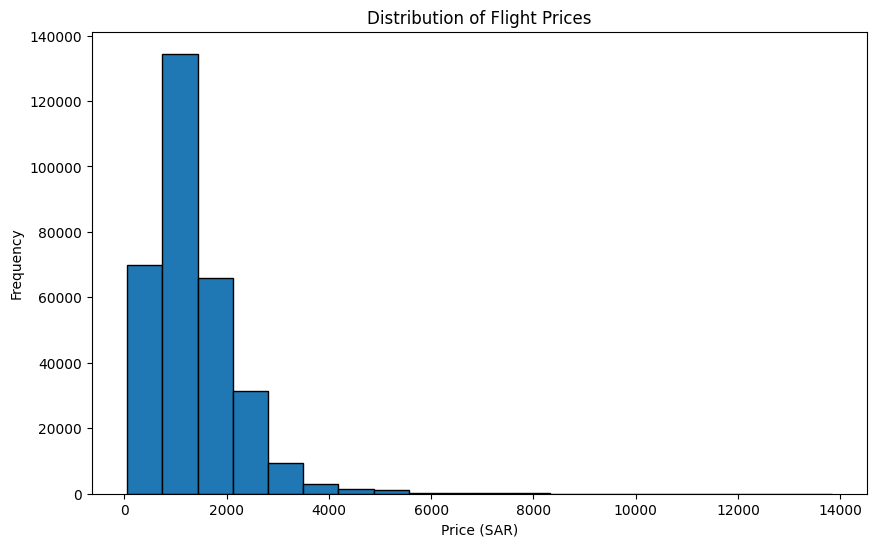

In [224]:
# Distribution of Prices
plt.figure(figsize=(10,6))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price (SAR)')
plt.ylabel('Frequency')
plt.show()

We plotted the distribution of flight prices using a histogram displaying the frequency of flight prices across specified bins. This visualization further emphasizes the distribution of prices, showing how many flights fall within different price ranges. Both plots serve to highlight the variations in flight prices within the dataset, aiding in understanding pricing patterns.

### Distribution of number of stops

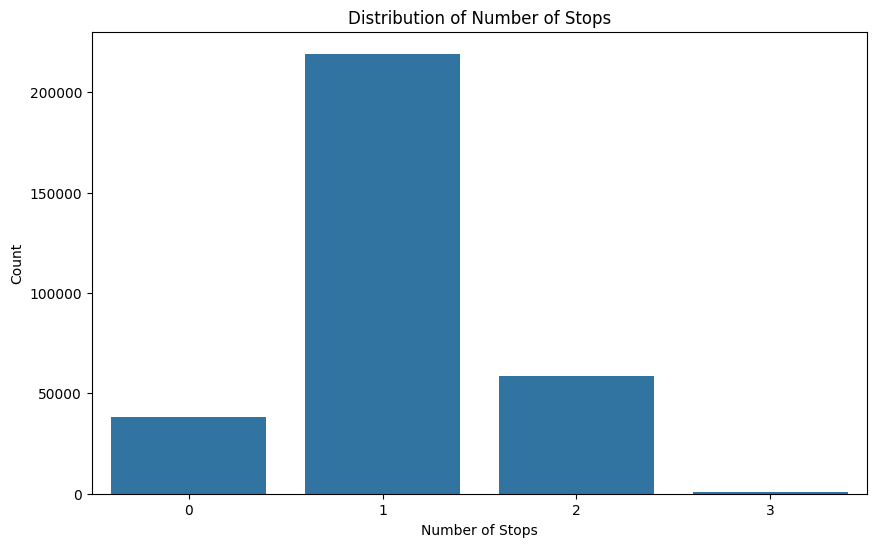

In [225]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Number Of Stops', data=df)
plt.title('Distribution of Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Count')
plt.show()

This code visualizes the distribution of flights based on the number of stops. This visualization helps to understand how many flights operate with zero, one, two, or more stops, providing insights into flight options available to travelers. The most frequent is flights with 1 stop.

### Prices trend over time

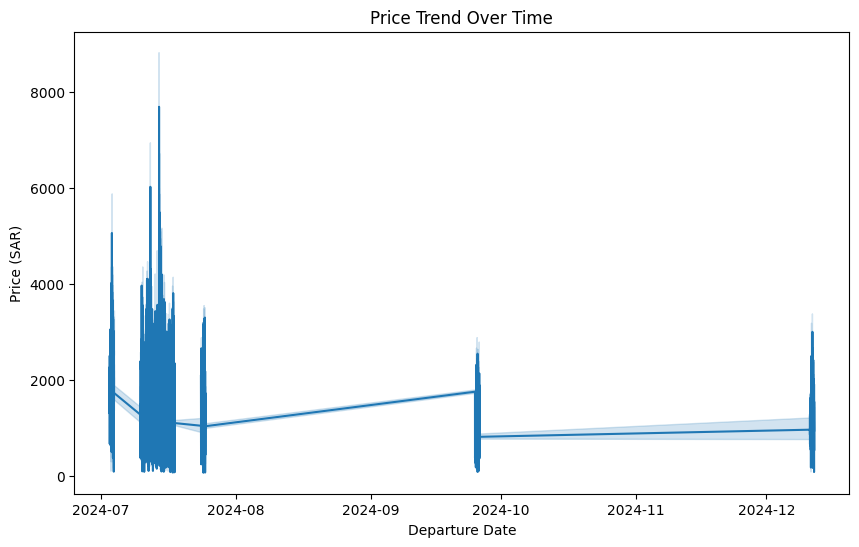

In [226]:
if 'Departure Date' in df.columns:
    df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
    
    # Plotting trend of prices over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Departure Date', y='Price', data=df)
    plt.title('Price Trend Over Time')
    plt.xlabel('Departure Date')
    plt.ylabel('Price (SAR)')
    plt.show()

This line plot depicts the trend of flight prices over time based on the departure dates. The visualization helps identify any fluctuations or patterns in pricing, allowing for a better understanding of how prices vary with departure dates. Notably, prices between July and August 2024 were the highest, indicating a peak in demand during that period.

### Flight Lands Next Day

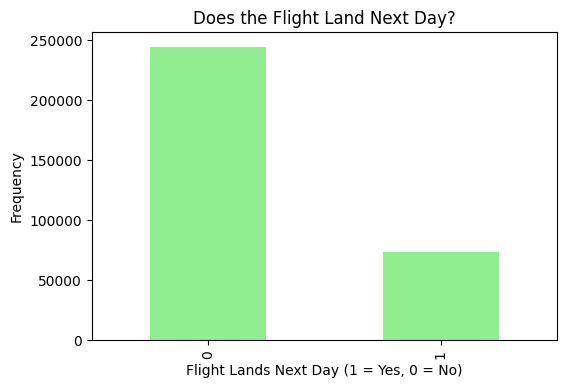

In [227]:
plt.figure(figsize=(6,4))
df['Flight Lands Next Day'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Does the Flight Land Next Day?')
plt.xlabel('Flight Lands Next Day (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.show()

This bar chart illustrates the frequency of flights landing the next day, with '1' indicating a yes and '0' a no. The data reveals that most flights do not land the next day, highlighting the distribution of overnight travel in the dataset.

### Airline distribution

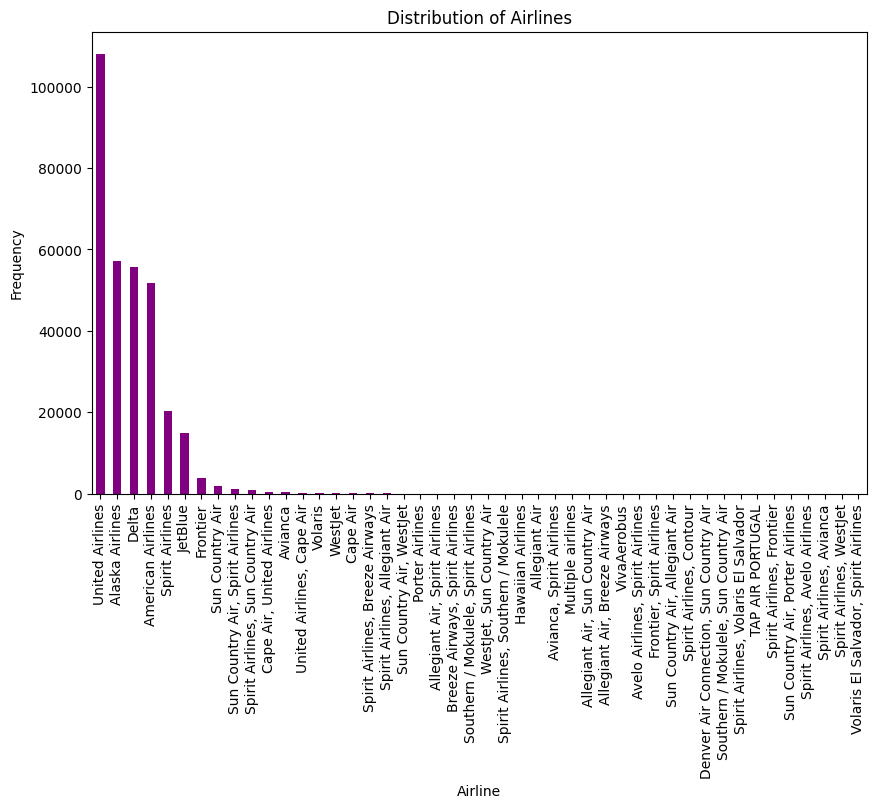

In [228]:
plt.figure(figsize=(10,6))
df['Airline'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Airlines')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.show()

This bar chart illustrates the distribution of airlines in the dataset, showcasing the frequency of flights operated by each airline. The visualization provides insight into the most popular airlines based on flight volume, highlighting the competitive landscape within the airline industry. The most frequent airline company iV "United Airlines" foloowed by "Alaska Airlines".

## Corraltion analysis

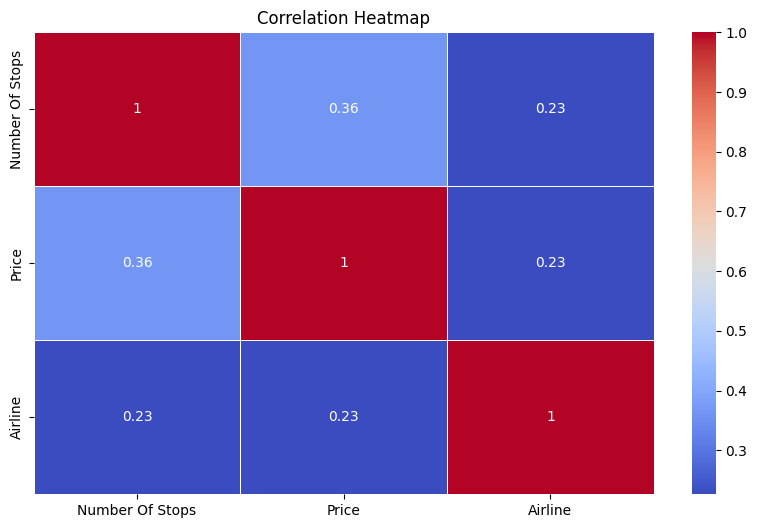

In [229]:
# Calculate the correlation matrix
correlation_matrix = df_encoded[['Number Of Stops', 'Price', 'Airline']].corr()

# Plotting correlation heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

This correlation heatmap illustrates the relationships between Number of Stops, Price, and Airline. The heatmap shows a moderate positive correlation (0.36) between the number of stops and price, indicating that flights with more stops tend to be more expensive. Additionally, the correlation between price and airline is 0.23, suggesting that different airlines charge varying prices, though the relationship is not strong. Similarly, there is a 0.23 correlation between the number of stops and airline, implying that some airlines may offer more direct or indirect flights, but the association is weak.

## Scatter plot

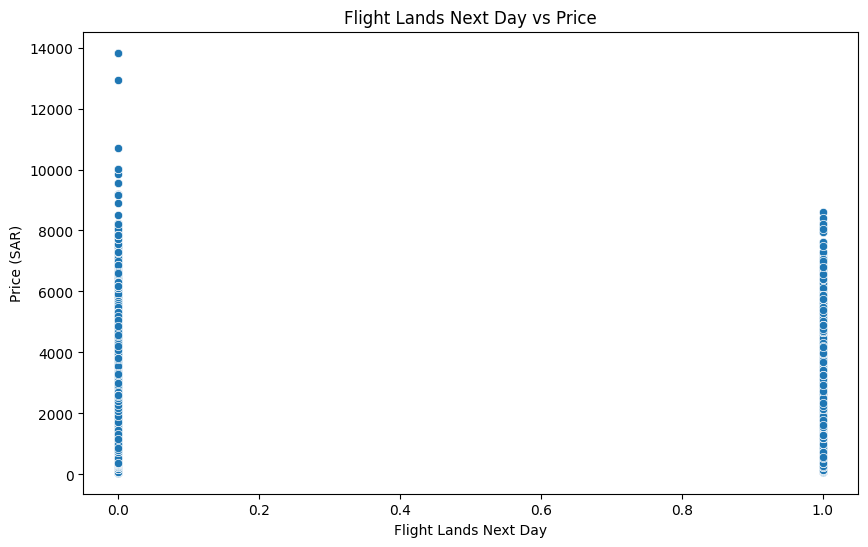

In [230]:
# Scatter plot for Flight Lands Next Day vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight Lands Next Day', y='Price', data=df)
plt.title('Flight Lands Next Day vs Price')
plt.xlabel('Flight Lands Next Day')
plt.ylabel('Price (SAR)')
plt.show()

if 'departure_date' in df.columns:
    df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
    
    # Trend of prices over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Departure Date', y='Price', data=df)
    plt.title('Price Trend Over Time')
    plt.xlabel('Departure Date')
    plt.ylabel('Price (SAR)')
    plt.show()

This scatter plot visualizes the relationship between whether a flight lands the next day (binary variable) and its price. This visualization can help identify any trends or patterns, showing if overnight flights tend to be priced differently compared to same-day arrivals. The x-axis represents whether a flight lands the next day, with 0 indicating that the flight does not land the next day and 1 indicating that it does. The y-axis represents the price in SAR. The distribution shows that there are price variations for both scenarios (landing the same day or the next day), but it seems that flights that land the next day may have slightly higher prices concentrated in certain ranges, suggesting a potential impact of overnight flights on pricing.

## Boxplot

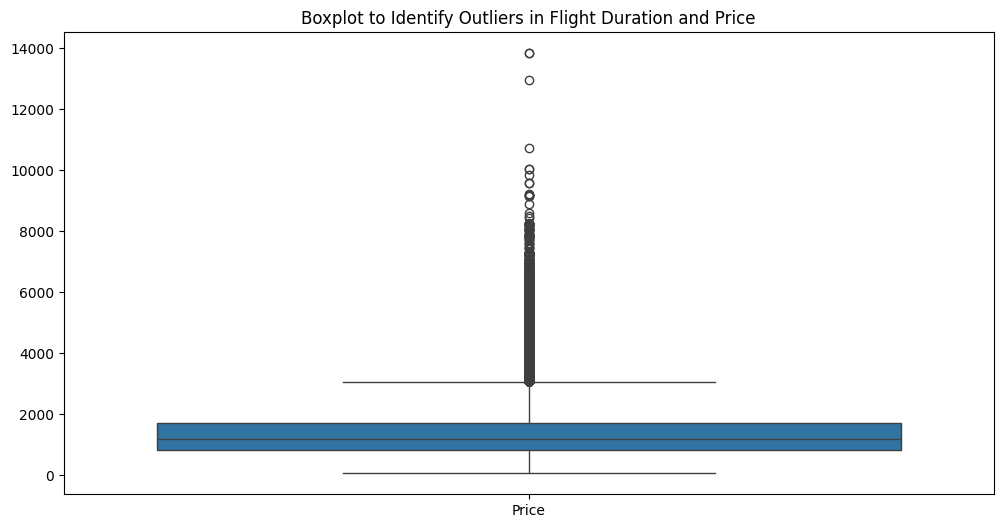

In [231]:
# Boxplot to identify outliers in numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Departure Date', 'Price']])
plt.title('Boxplot to Identify Outliers in Flight Duration and Price')
plt.show()

The boxplot provides a visual representation of the distribution of flight prices, helping to identify any potential outliers in the dataset. By analyzing the spread of prices,  such insights are crucial for understanding price variability and ensuring a more accurate analysis of flight pricing trends.

## Data Cleaning & Processing

### Import the libraries

In [232]:
import numpy as np
import re

### Handling missing values

In [233]:
missing_data = df.isnull().sum()
print(missing_data)

Searched Date                0
Departure Date               0
Arrival Date                 0
Flight Lands Next Day        0
Departure Airport            0
Arrival Airport              0
Number Of Stops              0
Route                    38397
Airline                      0
Cabin                        0
Price                        0
dtype: int64


The result indicates that most columns in our DataFrame are complete, with the exception of the 'Route' column, which has 38,397 missing values. Since we don't need the 'Route' column for our analysis, we will drop it along with the 'Searched Date' column. This will help streamline our dataset and focus on the relevant data necessary for our analysis.

In [234]:
df = df.drop(columns=['Route', 'Searched Date'])

# Confirm that the columns have been dropped
print(df.columns)

Index(['Departure Date', 'Arrival Date', 'Flight Lands Next Day',
       'Departure Airport', 'Arrival Airport', 'Number Of Stops', 'Airline',
       'Cabin', 'Price'],
      dtype='object')


## Data cleaning

### Convert the currency from $ to SAR

In [235]:
# Define the conversion rate from USD to SAR
usd_to_sar_rate = 3.75

# Remove dollar signs and commas from the 'Price' column and convert it to numeric
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert prices from USD to SAR
df['Price'] = df['Price'] * usd_to_sar_rate

# Display the first few rows to verify the changes
print(df[['Price']].head())

print("Prices have been successfully converted from USD to SAR.")

       Price
0  1167.1875
1  1406.2500
2  1096.8750
3  1406.2500
4  2081.2500
Prices have been successfully converted from USD to SAR.


In order to facilitate comparisons with our primary dataset, we converted the currency for the flights dataset to Saudi Riyals (SAR). This ensures consistency in the currency used across both datasets.

## Data processing

### Handling duplicate data

In [236]:
duplicate_rows = df.duplicated()

# To view the duplicate rows
df[duplicate_rows]

,Departure Date,Arrival Date,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Airline,Cabin,Price
205,2024-07-15 22:13:00,7/16/2024 14:49,1,LAX,ORD,2,Spirit Airlines,Economy,3515.6250
219,2024-07-15 16:00:00,7/16/2024 4:40,1,LAX,ORD,2,Alaska Airlines,Saver,5006.2500
257,2024-07-15 14:30:00,7/16/2024 4:40,1,LAX,ORD,2,Alaska Airlines,Saver,5400.0000
271,2024-07-15 12:00:00,7/16/2024 4:40,1,LAX,ORD,2,Alaska Airlines,Saver,5090.6250
291,2024-07-11 18:20:00,7/12/2024 7:43,1,LAS,BOS,1,Spirit Airlines,Economy,1420.3125
...,...,...,...,...,...,...,...,...,...
317249,2024-07-16 09:46:00,7/16/2024 21:59,0,LAS,BOS,1,United Airlines,Economy,2784.3750
317251,2024-07-16 21:20:00,7/17/2024 7:52,1,LAS,BOS,1,United Airlines,Economy,2784.3750
317252,2024-07-16 11:13:00,7/16/2024 19:33,0,LAS,BOS,0,JetBlue,Blue,4415.6250
317254,2024-07-16 22:59:00,7/17/2024 10:14,1,LAS,BOS,1,American Airlines,Basic Economy,2081.2500


The result indicates that our DataFrame has 155,186 duplicate rows across 11 columns, which could compromise data quality and analysis accuracy. We will keep these duplicates, as they might provide valuable insights. It’s important to investigate their cause to maintain the integrity of our dataset, and examining the specific columns contributing to the duplicates can further inform our analysis.

In [237]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the number of duplicates
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 155186


In [238]:
# Dropping duplicates (if any)
df = df.drop_duplicates(keep='first')

In this step, we removed all duplicate rows from the dataset, but retained the first occurrence of each duplicate. The keep='first' argument ensures that the first instance of any duplicate is kept, while subsequent duplicates are removed.

In [239]:
# Count the number of duplicate rows in the cleaned dataset
num_duplicates_cleaned = df.duplicated().sum()

# Print the number of duplicates in the cleaned dataset
print("Number of duplicate rows in the cleaned data:", num_duplicates_cleaned)

Number of duplicate rows in the cleaned data: 0


### Split the Departure Date and Time

In [240]:
# Convert 'Departure Date' to datetime to retain both date and time
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Create a new column for Departure Time by extracting the time part
df['Departure Time'] = df['Departure Date'].dt.time

# Now update the 'Departure Date' to keep only the date part
df['Departure Date'] = df['Departure Date'].dt.date

# Check the first few entries of both columns
print(df[['Departure Date', 'Departure Time']].head())

  Departure Date Departure Time
0     2024-07-16       23:48:00
1     2024-07-16       09:34:00
2     2024-07-16       23:48:00
3     2024-07-16       08:30:00
4     2024-07-16       07:00:00


We converted the 'Departure Date' column to datetime format to retain both the date and time components, which is important for accurately analyzing flight schedules. By doing this, we were able to create a new column, 'Departure Time,' that extracts just the time part from the original 'Departure Date.' We then updated the 'Departure Date' column to retain only the date portion, allowing us to separately handle date and time in our analysis. This separation is useful for various analyses or visualizations, enabling us to focus on specific aspects of the data, such as date-based aggregations or time-based calculations. The output confirms that the first few entries display 'Departure Date' in the YYYY-MM-DD format and 'Departure Time' in HH:MM format.

In [241]:
# Convert 'Departure Date' to datetime to retain both date and time
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])

# Create a new column for Departure Time by extracting the time part
df['Arrival Time'] = df['Arrival Date'].dt.time

# Now update the 'Departure Date' to keep only the date part
df['Arrival Date'] = df['Arrival Date'].dt.date

# Check the first few entries of both columns
print(df[['Arrival Date', 'Arrival Time']].head())

  Arrival Date Arrival Time
0   2024-07-17     15:03:00
1   2024-07-16     19:43:00
2   2024-07-17     15:03:00
3   2024-07-16     19:37:00
4   2024-07-16     16:36:00


Just like the 'Departure Date,' we converted the 'Arrival Date' column to datetime format to retain both the date and time components. We then extracted the time part into a new column called 'Arrival Time.' After that, we updated the 'Arrival Date' column to keep only the date portion. This allows us to separately analyze the date and time components for arrival schedules. The output confirms that the first few entries display 'Arrival Date' in the YYYY-MM-DD format and 'Arrival Time' in HH:MM format.

In [242]:
print(df.columns)

Index(['Departure Date', 'Arrival Date', 'Flight Lands Next Day',
       'Departure Airport', 'Arrival Airport', 'Number Of Stops', 'Airline',
       'Cabin', 'Price', 'Departure Time', 'Arrival Time'],
      dtype='object')


This shows the following columns in our Secondary Dataset:
- Departure Date: The date of the flight's departure.
- Arrival Date: The date of the flight's arrival.
- Flight Lands Next Day: Indicates whether the flight lands on the next day.
- Departure Airport: The airport from which the flight departs.
- Arrival Airport: The airport where the flight arrives.
- Number Of Stops: The number of stops during the flight.
- Airline: The airline operating the flight.
- Cabin: The class of service (e.g., economy, business).
- Price: The cost of the flight.
- Departure Time: The time of the flight's departure.
- Arrival Time: The time of the flight's arrival.
This structure provides a comprehensive overview of the flight data we are working with, enabling us to perform various analyses and visualizations related to flight schedules and pricing. 

In [243]:
# Filter the DataFrame to keep only rows where Cabin is 'Economy'
economy_df = df[df['Cabin'] == 'Economy']

# Drop the 'Cabin' column
economy_df = economy_df.drop(columns=['Cabin'])

# Save the filtered DataFrame to a CSV file
economy_df.to_csv('flightsCleanedSecondary1.csv', index=False)

# Display a message to confirm saving
print("The dataset has been saved.")

The dataset has been saved.


We filtered the DataFrame to keep only the rows with "Economy" in the 'Cabin' column because our primary dataset was gathered focusing on economy class. By doing this, we ensure consistency between the two datasets, which is essential for accurate analysis and comparison. After filtering, we dropped the 'Cabin' column and saved the resulting dataset to a CSV file, maintaining the integrity of our data.

In [244]:
print(economy_df.columns)

Index(['Departure Date', 'Arrival Date', 'Flight Lands Next Day',
       'Departure Airport', 'Arrival Airport', 'Number Of Stops', 'Airline',
       'Price', 'Departure Time', 'Arrival Time'],
      dtype='object')


This confirms that the 'Cabin' column has been successfully removed, and we now have a streamlined dataset focusing on economy class flights, making it easier for us to conduct analyses and draw insights from the relevant columns.

### Rename columns

To streamline our analysis, we decided to modify the dataset flightsCleanedSecondary1.csv in Excel. Excel's interface made it much more efficient to rename columns quickly, ensuring they matched the structure of our primary dataset. This alignment was crucial for simplifying the comparison and integration of data between the two datasets. By making these adjustments in Excel, we minimized the potential for errors that could arise from manually renaming columns in code. The modified dataset was then saved as flightsCleanedSecondary.csv, ready for easier and more consistent analysis.

### Add 'Flight Duration' Coulmn

In [245]:
import pandas as pd

In [246]:
# Read the CSV files into dataframes
df = pd.read_csv('flightsCleanedSecondary.csv')

# Convert the "Departure Time" and "Arrival Time" columns to datetime, including date and time
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%Y-%m-%d %H:%M:%S')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%Y-%m-%d %H:%M:%S')

# Calculate the Flight Duration in minutes and rename the column to 'Flight Duration'
df['Flight Duration'] = (df['Arrival Time'] - df['Departure Time']).dt.total_seconds() / 60

# Adjust for flights landing the next day
df.loc[df['Flight Duration'] < 0, 'Flight Duration'] += 24 * 60

# The df now contains the updated "Flight Duration" column in memory, without saving to a new file.
print("Dataset updated with 'Flight Duration' column.")


Dataset updated with 'Flight Duration' column.


To accurately capture flight times, we converted the "Departure Time" and "Arrival Time" columns into a proper datetime format, which included both the date and time. This allowed us to calculate the "Flight Duration" in minutes by determining the difference between the two times. Additionally, we accounted for flights that might have landed on the next day by adjusting negative durations. Any negative flight duration values (indicating overnight flights) were corrected by adding 24 hours to ensure the calculation was accurate.
With these transformations, the dataset was enhanced by the new "Flight Duration" column, which is now available for further analysis without needing to save it to a separate file.

### Changing Arrival Time, Departure Time data type format to 24 hour

In [247]:
# Replacing '1900-01-01' with NaN Departure Time
df['Arrival Time'] = df['Arrival Time'].replace('1900-01-01', pd.NA)
df['Departure Time'] = df['Departure Time'].replace('1900-01-01', pd.NA)

# Converting the 'Arrival Time' to a datetime object, only considering the time
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce').dt.time
df['Departure Time'] = pd.to_datetime(df['Departure Time'], errors='coerce').dt.time

# Checking the updated 'Arrival Time' column
# Displaying the first few rows of only the 'Departure Time' and 'Arrival Time' columns
df[['Departure Time', 'Arrival Time','Flight Lands Next Day']].head()


# The dataset is updated in place without creating a new file

,Departure Time,Arrival Time,Flight Lands Next Day
0,23:48:00,15:03:00,1
1,09:34:00,19:43:00,0
2,23:48:00,15:03:00,1
3,08:30:00,19:37:00,0
4,05:00:00,15:20:00,0


In our data processing pipeline, we implemented changes to ensure the "Departure Time" and "Arrival Time" columns in the dataset are more manageable for analysis. Specifically, we converted these columns to a 24-hour format by first replacing erroneous placeholder values like '1900-01-01' with NaN, ensuring the dataset is clean and free from incorrect date references. We then converted both time columns to a proper datetime format, focusing only on the time component, and addressed any potential errors using errors='coerce'. This step ensures that times are standardized for consistency across the dataset.

In [248]:
# Saving the updated dataset to a new CSV file after the changes have been made
updated_file_path = 'FINALSecondaryDataCleaned.csv'
df.to_csv(updated_file_path, index=False)

updated_file_path

'1FINALSecondaryDataCleaned.csv'

## Comparison between Before and After Cleaning

### Load the dataset

In [249]:
# Step 1: Load the dataset
df = pd.read_csv('FINALSecondaryDataCleaned.csv')

### Overview of the dataset

In [250]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

#  Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())

First few rows of the dataset:
  Departure Date Arrival Date  Flight Lands Next Day Departure City  \
0      7/16/2024    7/17/2024                      1            LAS   
1      7/16/2024    7/16/2024                      0            LAS   
2      7/16/2024    7/17/2024                      1            LAS   
3      7/16/2024    7/16/2024                      0            LAS   
4      7/16/2024    7/16/2024                      0            LAS   

  Arrival City  Number Of Stops          Airline   Price Departure Time  \
0          BOS                1  Spirit Airlines  311.25       23:48:00   
1          BOS                1  Spirit Airlines  375.00       09:34:00   
2          BOS                1  Spirit Airlines  292.50       23:48:00   
3          BOS                1  Spirit Airlines  375.00       08:30:00   
4          BOS                1  Spirit Airlines  375.00       05:00:00   

  Arrival Time  Flight Duration  
0     15:03:00            915.0  
1     19:43:00         

The cleaned dataset shows notable improvements compared to the original. Several columns, including Searched Date, Departure Airport, and Route, were removed to streamline the dataset, while new columns for Departure City and Arrival City were added, enhancing clarity regarding flight origins and destinations. The Departure Time and Arrival Time columns were reformatted to clearly differentiate between date and time, facilitating better time calculations and analyses, especially in calculating the newly introduced Flight Duration column, which measures the time difference between departure and arrival in minutes. The cleaned dataset now contains 101,780 rows, a significant reduction from 317,260 rows, indicating the success of data cleaning processes such as removing duplicates and filtering irrelevant flights. Additionally, the average flight price has slightly decreased from $1349.59 to $1264.24, reflecting the removal of potentially erroneous entries. The mean value for the Flight Lands Next Day column increased from 0.230 to 0.288, suggesting a higher proportion of flights landing the next day in the cleaned dataset. Importantly, the cleaned dataset has no missing values, contrasting sharply with the original dataset, which had 38,397 missing values in the Route column. Overall, the cleaning process has enhanced the dataset's clarity and usability, making it more suitable for deriving insights related to flight patterns, pricing strategies, and operational performance.

In [251]:
# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())


Statistical summary of the dataset:
       Flight Lands Next Day  Number Of Stops          Price  Flight Duration
count          101780.000000    101780.000000  101780.000000    101780.000000
mean                0.288062         1.232737    1264.235901       653.071193
std                 0.452863         0.499392     574.212445       236.854192
min                 0.000000         0.000000      56.250000         1.000000
25%                 0.000000         1.000000     881.250000       474.000000
50%                 0.000000         1.000000    1215.000000       646.000000
75%                 1.000000         2.000000    1616.250000       809.000000
max                 1.000000         3.000000    6937.500000      1437.000000


The statistical summary of the dataset highlights significant changes following the cleaning process. Initially, the dataset contained 317,260 entries, with the Flight Lands Next Day mean at 0.230 and the Number of Stops averaging 1.070. The average flight price was 1,349.59, with a standard deviation of 806.14, indicating considerable variability in pricing. After cleaning, the dataset was reduced to 101,780 entries, and the mean for Flight Lands Next Day increased to 0.288, suggesting a greater proportion of flights now land the next day. The Number of Stops also rose to an average of 1.233, indicating an increase in the average number of stops per flight. Additionally, the mean price decreased slightly to 1,264.24, with a reduced standard deviation of 574.21, signifying less variability in prices after cleaning. A new column, Flight Duration, was introduced, with an average duration of 653.07 minutes, reflecting the efficiency of time management in the dataset. The minimum flight duration was recorded at 1 minute, while the maximum extended to 1,437 minutes, showing a wide range of flight durations. Overall, the cleaning process not only streamlined the dataset but also provided a clearer and more concise statistical overview, facilitating improved data analysis and insights.

In [252]:
print("Columns in the dataset:")
print(df.columns)

# Encode categorical columns
df_encoded = df.copy()
if 'Airline' in df.columns:
    df_encoded['Airline'] = pd.factorize(df['Airline'])[0]
if 'Departure Airport' in df.columns:
    df_encoded['Departure Airport'] = pd.factorize(df['Departure Airport'])[0]
if 'Arrival Airport' in df.columns:
    df_encoded['Arrival Airport'] = pd.factorize(df['Arrival Airport'])[0]

# Convert 'Number Of Stops' to numeric, handling non-numeric values
df_encoded['Number Of Stops'] = pd.to_numeric(df_encoded['Number Of Stops'], errors='coerce')

# Check for any NaN values that may affect correlation calculations
print("\nChecking for NaN values after encoding:")
print(df_encoded[['Number Of Stops', 'Price', 'Airline']].isnull().sum())

# Drop any rows with NaN values in the relevant columns
df_encoded.dropna(subset=['Number Of Stops', 'Price', 'Airline'], inplace=True)

# Display the first few rows of the processed DataFrame
print("\nProcessed DataFrame:")
print(df_encoded.head())

Columns in the dataset:
Index(['Departure Date', 'Arrival Date', 'Flight Lands Next Day',
       'Departure City', 'Arrival City', 'Number Of Stops', 'Airline', 'Price',
       'Departure Time', 'Arrival Time', 'Flight Duration'],
      dtype='object')

Checking for NaN values after encoding:
Number Of Stops    0
Price              0
Airline            0
dtype: int64

Processed DataFrame:
  Departure Date Arrival Date  Flight Lands Next Day Departure City  \
0      7/16/2024    7/17/2024                      1            LAS   
1      7/16/2024    7/16/2024                      0            LAS   
2      7/16/2024    7/17/2024                      1            LAS   
3      7/16/2024    7/16/2024                      0            LAS   
4      7/16/2024    7/16/2024                      0            LAS   

  Arrival City  Number Of Stops  Airline   Price Departure Time Arrival Time  \
0          BOS                1        0  311.25       23:48:00     15:03:00   
1          BOS       

Upon checking for missing values after encoding, it was confirmed that there were no NaN values in the Number Of Stops, Price, and Airline columns, ensuring the integrity of the data for analysis. The processed DataFrame reflects these changes, with new columns for departure and arrival cities, as well as time-related information and flight duration, enhancing the dataset's usability for further analysis. The modification of the dataset indicates a more organized and efficient structure, which will facilitate better insights and conclusions in subsequent analyses.